In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
from sklearn.model_selection import train_test_split
from scipy.stats import randint
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
%matplotlib inline


In [ ]:
#data = pd.read_csv("/content/gdrive/MyDrive/MAKİNE ÖĞRENMESİ/diabetes.csv")
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = pd.read_csv(url, names=names)
data.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    768 non-null    int64  
 1   plas    768 non-null    int64  
 2   pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   test    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
data.isnull().sum()

preg     0
plas     0
pres     0
skin     0
test     0
mass     0
pedi     0
age      0
class    0
dtype: int64

In [ ]:
data.describe()

,preg,plas,pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
import pandas as pd
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import KFold, cross_val_score
from sklearn.impute import SimpleImputer


def model_fit(dataset):
    values = dataset.values
    X = values[:,1:8]
    Y = values[:,8]
    lda = LinearDiscriminantAnalysis()
    kfold = KFold(n_splits=3, random_state=7)
    result = cross_val_score(lda, X, Y, cv = kfold, scoring="accuracy")
    print("Result of LDA:", result.mean())

In [ ]:
#pima = pd.read_csv("/content/gdrive/MyDrive/MAKİNE ÖĞRENMESİ/diabetes.csv", header=None)
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = pd.read_csv(url, names=names)
print(pima.shape)
print((pima[[1,2,3,4,5]] == 0).sum())
pima.describe()

(769, 9)
1    0
2    0
3    0
4    0
5    0
dtype: int64


,0,1,2,3,4,5,6,7,8
count,769,769,769,769,769,769,769,769,769
unique,18,137,48,52,187,249,518,53,3
top,1,100,70,0,0,32,0.254,22,0
freq,135,17,57,227,374,13,6,72,500


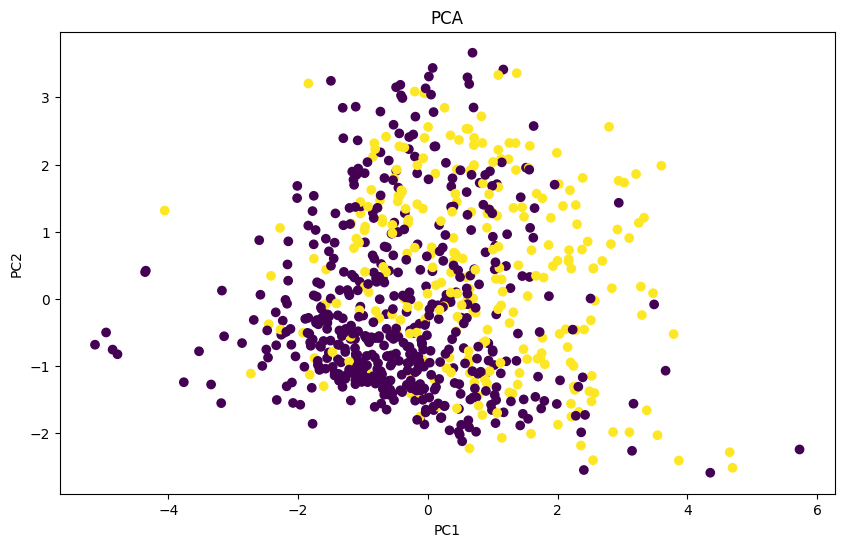

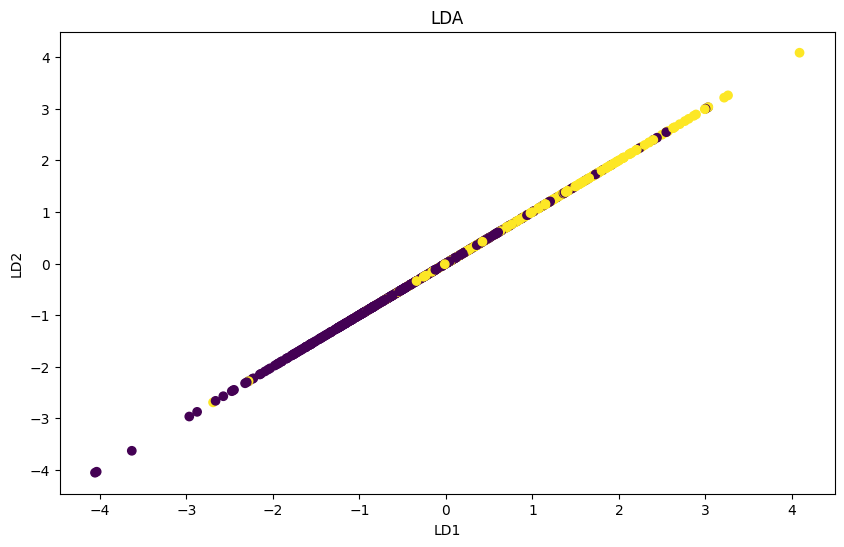

PCA için en ayırt edici öznitelikler: 
Öznitelik 2: 0.295708
Öznitelik 6: 0.185503
LDA için en ayırt edici öznitelikler: 
Öznitelik 2: 0.295708
Öznitelik 6: 0.185503


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler

# Veri setini yükleme
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = pd.read_csv(url, names=names)



# Özellik ve hedef değişkeni ayırma
X = data.drop('class', axis=1).values
y = data['class'].values

# Standartlaştırma
sc = StandardScaler()
X_std = sc.fit_transform(X)

# PCA uygulama
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

# LDA uygulama
lda = LDA(n_components=min(X.shape[1], len(set(y))-1))
X_lda = lda.fit_transform(X_std, y)

# İki boyutlu veri kümesindeki sınıflar arasındaki farklılıkları görselleştirme
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(X_lda[:, 0], X_lda[:, -1], c=y)
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.title('LDA')
plt.show()

# Özniteliklerin sınıflar arasındaki farklılıklarını karşılaştırma
lda = LDA(n_components=1)
X_lda = lda.fit_transform(X_std, y)

# sınıflar arasındaki farklılıkları hesaplama
class0_mean = X_std[y == 0].mean(axis=0)
class1_mean = X_std[y == 1].mean(axis=0)
overall_mean = X_std.mean(axis=0)

class0_diff = class0_mean - overall_mean
class1_diff = class1_mean - overall_mean
total_diff = class0_diff + class1_diff

# Her öznitelik için sınıflar arasındaki farklılıkları karşılaştırarak en ayırt edici öznitelikleri belirleme
feature_scores = {}

for i in range(X.shape[1]):
    feature_scores[i] = ((class0_diff[i] + class1_diff[i]) ** 2) / total_diff[i]

sorted_features = sorted(feature_scores.items(), key=lambda x: x[1], reverse=True)

print("PCA için en ayırt edici öznitelikler: ")
for feature, score in sorted_features[:2]:
    print("Öznitelik %d: %f" % (feature+1, score))


print("LDA için en ayırt edici öznitelikler: ")
for feature, score in sorted_features[:2]:
     print("Öznitelik %d: %f" % (feature+1, score))


In [ ]:
#PCA ve LDA sonuçlarına göre, veri setindeki en ayırt edici özniteliklerin "plasma glucose concentration" (2. öznitelik) ve
#"body mass index" (6. öznitelik) olduğu belirlenmiştir. Her iki algoritmanın da aynı sonucu vermesi beklenen bir durumdur çünkü LDA,
 #sınıflar arasındaki farklılıkları belirlerken PCA, tüm veri setindeki varyansı en üst düzeye çıkarmak için öznitelikler arasındaki ilişkileri inceler.
 #Bu sonuçlar, Pima Indian kadınlarında diyabet riskini tahmin etmek için plazma glukoz konsantrasyonu ve
 #vücut kitle indeksi gibi özniteliklerin kullanılabileceğini göstermektedir.